In [1]:
#Install mlxtend if not already installed
#!pip install mlxten


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler   
import matplotlib.pyplot as plt

In [3]:
dataset1=pd.read_csv("Concrete_Data_Yeh.csv",index_col=None)

In [4]:
df2=dataset1

df2 = pd.get_dummies(df2, drop_first=True)

df2


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
indep_X=df2.drop('csMPa', axis=1)#drop output column separately using drop_function
dep_Y=df2['csMPa']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.2, random_state=42)


In [7]:
# Create a StandardScaler 
scaler = StandardScaler()
# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
log_model=LinearRegression()
RF=RandomForestRegressor(n_estimators = 10, random_state = 0)
DT=DecisionTreeRegressor(random_state = 0)
SVM=SVR(kernel='linear')
SVM_NL=SVR(kernel='rbf')    

In [9]:
#verbose is used to see the model result is training section , we will verbose with or without in the function 
#sfs = SequentialFeatureSelector(log_model, k_features='best',forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)
sfs = SequentialFeatureSelector(log_model, k_features='best',forward=True,floating=False,scoring='r2',cv=5)


In [10]:
#sfs1=sfs.fit(X_train_scaled, y_train)

In [11]:
#selected_features_idx = list(sfs1.k_feature_idx_) 

In [12]:
#selected_features_idx

In [13]:
#selected_features_names = list(sfs1.k_feature_names_) 

In [14]:
#selected_features_names

In [15]:
#selected_features_score = sfs1.k_score_

In [16]:
#selected_features_score

In [17]:
#sf=sfs1.get_metric_dict()

In [18]:
#sf

In [19]:
#results=pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

In [20]:
#results

In [21]:
#verbose is used to see the model result is training section , we will verbose with or without in the function 
#sfs = SequentialFeatureSelector(log_model, k_features='best',forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

In [22]:
def LOG_SFS(log_model,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(log_model, k_features='best',forward=True,floating=False,scoring='r2',cv=5)
    sfs1=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs1.k_feature_idx_) 
    selected_features_names = list(sfs1.k_feature_names_) 
    selected_features_score = sfs1.k_score_
    sf=sfs1.get_metric_dict()
    results=pd.DataFrame.from_dict((sf)).T
    return selected_features_idx,selected_features_names, selected_features_score,sf,results


def RF_SFS(RF,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(RF, k_features='best',forward=True,floating=False,scoring='r2',cv=5)
    sfs_1=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs_1.k_feature_idx_) 
    selected_features_names = list(sfs_1.k_feature_names_) 
    selected_features_score = sfs_1.k_score_
    sfd=sfs_1.get_metric_dict()
    results=pd.DataFrame.from_dict((sfd)).T
    return selected_features_idx,selected_features_names, selected_features_score,sfd,results


def DT_SFS(DT,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(DT, k_features='best',forward=True,floating=False,scoring='r2',cv=5)
    sfs2=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs2.k_feature_idx_) 
    selected_features_names = list(sfs2.k_feature_names_) 
    selected_features_score = sfs2.k_score_
    sfn=sfs2.get_metric_dict()
    results=pd.DataFrame.from_dict((sfn)).T
    return selected_features_idx,selected_features_names, selected_features_score,sfn,results


def SVM_SFS(SVM,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(SVM, k_features='best',forward=True,floating=False,scoring='r2',cv=5)
    sfs3=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs3.k_feature_idx_) 
    selected_features_names = list(sfs3.k_feature_names_) 
    selected_features_score = sfs3.k_score_
    sfe=sfs3.get_metric_dict()
    results=pd.DataFrame.from_dict((sfe)).T
    return selected_features_idx,selected_features_names, selected_features_score,sfe,results


def SVM_NL_SFS(SVM_NL,X_train_scaled,y_train):
    
    sfs = SequentialFeatureSelector(SVM_NL, k_features='best',forward=True,floating=False,scoring='r2',cv=5)
    sfs4=sfs.fit(X_train_scaled, y_train)
    selected_features_idx = list(sfs4.k_feature_idx_) 
    selected_features_names = list(sfs4.k_feature_names_) 
    selected_features_score = sfs4.k_score_
    sfa=sfs4.get_metric_dict()
    results=pd.DataFrame.from_dict((sfa)).T
    return selected_features_idx,selected_features_names, selected_features_score,sfa,results




In [23]:
selected_features_idx,selected_features_names, selected_features_score,sf,results=LOG_SFS(log_model,X_train_scaled,y_train)

In [24]:
results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.2747242991845942, 0.23987623163020555, 0.29...",0.236714,"(0,)",0.0761529,0.0592496,0.0296248
2,"(0, 4)","[0.28875810157399173, 0.3468326331951831, 0.40...",0.336595,"(0, 4)",0.0921915,0.0717281,0.0358641
3,"(0, 4, 7)","[0.3722044698518493, 0.43473464625889346, 0.54...",0.463956,"(0, 4, 7)",0.0777282,0.0604752,0.0302376
4,"(0, 1, 4, 7)","[0.4792848778292773, 0.4582312595912741, 0.658...",0.547082,"(0, 1, 4, 7)",0.0947616,0.0737278,0.0368639
5,"(0, 1, 3, 4, 7)","[0.5308073112411962, 0.5028648952737464, 0.673...",0.577381,"(0, 1, 3, 4, 7)",0.0772636,0.0601137,0.0300568
6,"(0, 1, 2, 3, 4, 7)","[0.5718771572174023, 0.5200606251250548, 0.700...",0.594595,"(0, 1, 2, 3, 4, 7)",0.0814962,0.0634068,0.0317034
7,"(0, 1, 2, 3, 4, 6, 7)","[0.5704104342264666, 0.521766631397405, 0.7011...",0.594819,"(0, 1, 2, 3, 4, 6, 7)",0.0819043,0.0637243,0.0318622
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.5630473491415469, 0.5257154108042232, 0.704...",0.594606,"(0, 1, 2, 3, 4, 5, 6, 7)",0.084195,0.0655066,0.0327533


In [25]:
log_result= results[["feature_idx","feature_names","avg_score"]]

In [26]:
log_result


,feature_idx,feature_names,avg_score
1,"(0,)","(0,)",0.236714
2,"(0, 4)","(0, 4)",0.336595
3,"(0, 4, 7)","(0, 4, 7)",0.463956
4,"(0, 1, 4, 7)","(0, 1, 4, 7)",0.547082
5,"(0, 1, 3, 4, 7)","(0, 1, 3, 4, 7)",0.577381
6,"(0, 1, 2, 3, 4, 7)","(0, 1, 2, 3, 4, 7)",0.594595
7,"(0, 1, 2, 3, 4, 6, 7)","(0, 1, 2, 3, 4, 6, 7)",0.594819
8,"(0, 1, 2, 3, 4, 5, 6, 7)","(0, 1, 2, 3, 4, 5, 6, 7)",0.594606


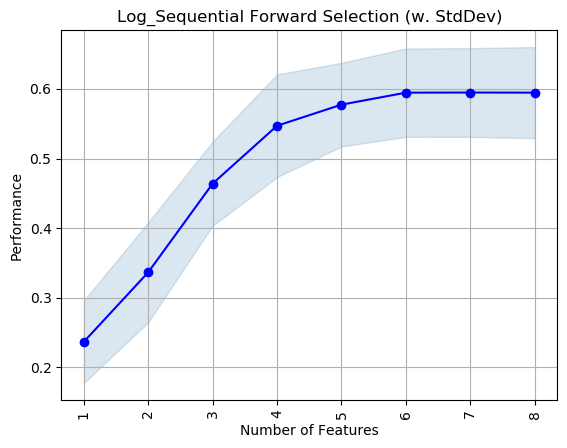

In [27]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs(sf, kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('Log_Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [28]:
selected_features_idx,selected_features_names,selected_features_score,sfd,results=RF_SFS(RF,X_train_scaled,y_train)
results
RF_result= results[["feature_idx","feature_names","avg_score"]]

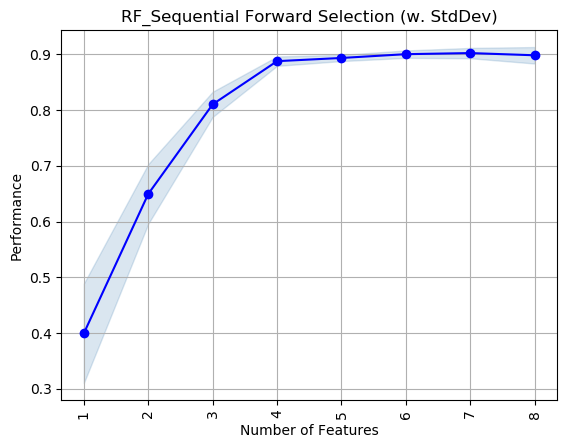

In [29]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs( sfd ,kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('RF_Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [30]:
selected_features_idx,selected_features_names, selected_features_score,sfn,results=DT_SFS(DT,X_train_scaled,y_train)
results
DT_result= results[["feature_idx","feature_names","avg_score"]]

In [31]:
DT_result

,feature_idx,feature_names,avg_score
1,"(7,)","(7,)",0.400523
2,"(0, 7)","(0, 7)",0.543245
3,"(0, 1, 7)","(0, 1, 7)",0.748809
4,"(0, 1, 3, 7)","(0, 1, 3, 7)",0.825838
5,"(0, 1, 3, 4, 7)","(0, 1, 3, 4, 7)",0.828106
6,"(0, 1, 3, 4, 5, 7)","(0, 1, 3, 4, 5, 7)",0.82832
7,"(0, 1, 2, 3, 4, 5, 7)","(0, 1, 2, 3, 4, 5, 7)",0.82759
8,"(0, 1, 2, 3, 4, 5, 6, 7)","(0, 1, 2, 3, 4, 5, 6, 7)",0.800776


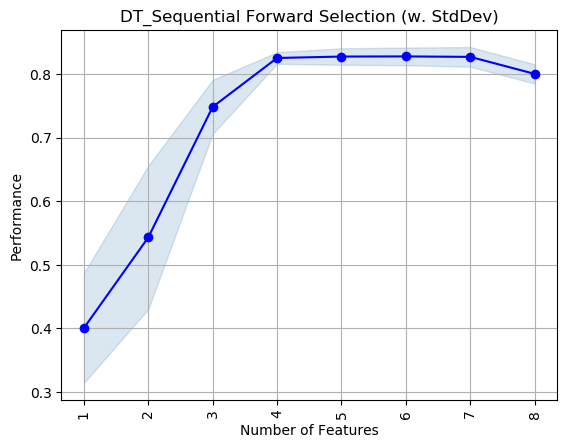

In [32]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs(sfn, kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('DT_Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [33]:
selected_features_idx,selected_features_names, selected_features_score,sfe,results=SVM_SFS(SVM,X_train_scaled,y_train)
results
SVM_L_result= results[["feature_idx","feature_names","avg_score"]]

In [34]:
SVM_L_result

,feature_idx,feature_names,avg_score
1,"(0,)","(0,)",0.232415
2,"(0, 1)","(0, 1)",0.33345
3,"(0, 1, 7)","(0, 1, 7)",0.418447
4,"(0, 1, 3, 7)","(0, 1, 3, 7)",0.537517
5,"(0, 1, 2, 3, 7)","(0, 1, 2, 3, 7)",0.553897
6,"(0, 1, 2, 3, 6, 7)","(0, 1, 2, 3, 6, 7)",0.55581
7,"(0, 1, 2, 3, 5, 6, 7)","(0, 1, 2, 3, 5, 6, 7)",0.553892
8,"(0, 1, 2, 3, 4, 5, 6, 7)","(0, 1, 2, 3, 4, 5, 6, 7)",0.552652


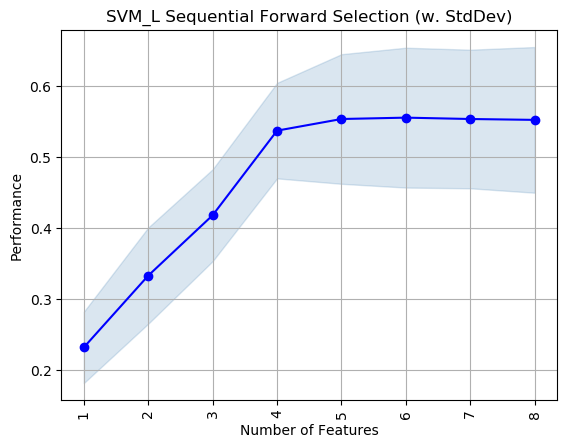

In [35]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs(sfe, kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('SVM_L Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [36]:
selected_features_idx,selected_features_names, selected_features_score,sfa,results=SVM_NL_SFS(SVM_NL,X_train_scaled,y_train)
results
SVM_NL_result= results[["feature_idx","feature_names","avg_score"]]

In [37]:
SVM_NL_result

,feature_idx,feature_names,avg_score
1,"(7,)","(7,)",0.311119
2,"(0, 7)","(0, 7)",0.54049
3,"(0, 3, 7)","(0, 3, 7)",0.616939
4,"(0, 1, 3, 7)","(0, 1, 3, 7)",0.678795
5,"(0, 1, 2, 3, 7)","(0, 1, 2, 3, 7)",0.682179
6,"(0, 1, 2, 3, 6, 7)","(0, 1, 2, 3, 6, 7)",0.664554
7,"(0, 1, 2, 3, 4, 6, 7)","(0, 1, 2, 3, 4, 6, 7)",0.657135
8,"(0, 1, 2, 3, 4, 5, 6, 7)","(0, 1, 2, 3, 4, 5, 6, 7)",0.629361


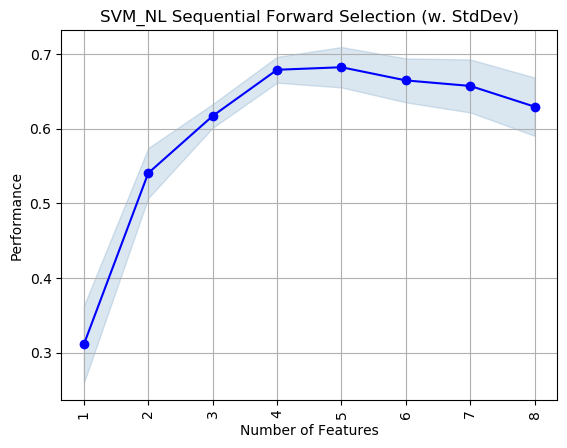

In [38]:
# plotting graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming sfs1 is your SequentialFeatureSelector instance
fig = plot_sfs(sfa, kind='std_dev')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

plt.title('SVM_NL Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [39]:
# Combine the two DataFrames vertically (along rows)
#combined_results = pd.concat([log_result,RF_result,DT_result,SVM_L_result,SVM_NL_result], ignore_index=True)


In [40]:
# Print or use the combined_results DataFrame
#combined_results